In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes, box_boundaries
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider
from heatmap import HeatMap 

In [2]:
svc = joblib.load('svc2.pkl')
scaler = joblib.load('scaler2.pkl')

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 11,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)
src = FeatureSourcer(sourcer_params, imread("vehicles/KITTI_extracted/5364.png"))
slider = Slider(sourcer = src, classifier = cls, increment = 8)

frame1 = imread("test1.jpg")
frame2 = imread("test2.jpg")
frame3 = imread("test3.jpg")
frame4 = imread("test4.jpg")
frame5 = imread("test5.jpg")
frame6 = imread("test6.jpg")

window_sizes = 64, 80, 120, 150
window_positions = 360, 410, 390, 380

heatmap = HeatMap(frame = frame1, thresh = 6, memory = 4)

In [3]:
def heatmap_test(this_frame, this_heatmap, ws, wp):
  this_heatmap.reset()

  for sz, pos in zip(ws, wp):
    bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
    this_heatmap.update(bounding_boxes)

  this_heatmap.show(this_frame)

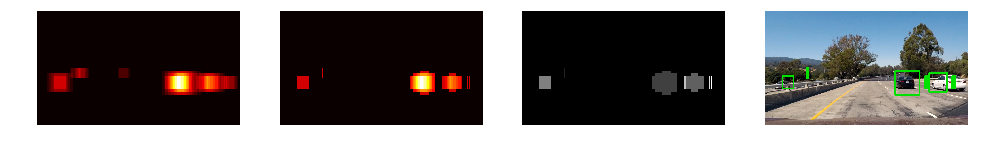

In [4]:
heatmap_test(frame1, heatmap, window_sizes, window_positions)

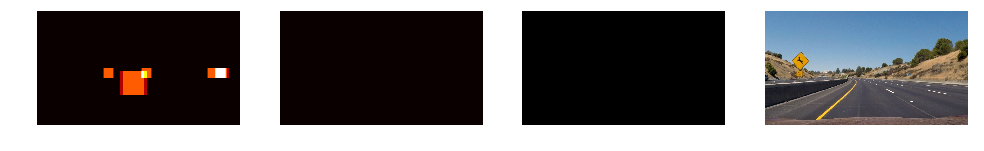

In [5]:
heatmap_test(frame2, heatmap, window_sizes, window_positions)

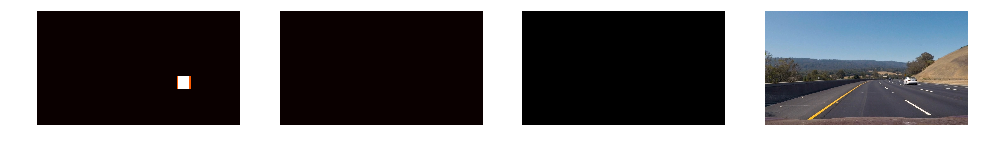

In [6]:
heatmap_test(frame3, heatmap, window_sizes, window_positions)

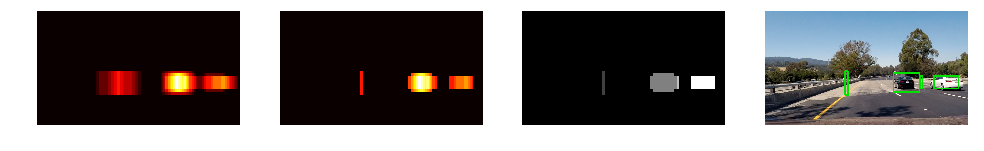

In [7]:
heatmap_test(frame4, heatmap, window_sizes, window_positions)

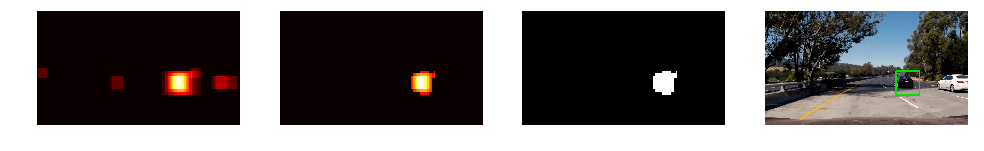

In [8]:
heatmap_test(frame5, heatmap, window_sizes, window_positions)

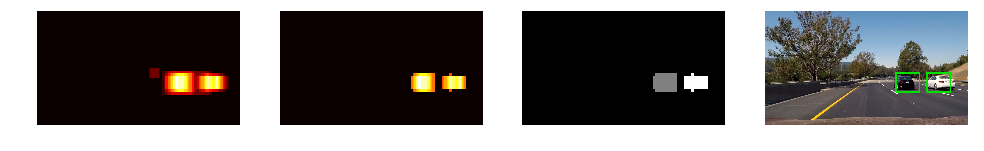

In [9]:
heatmap_test(frame6, heatmap, window_sizes, window_positions)

In [10]:
ws = 80, 120, 160, 180, 240
wp = 410, 390, 380, 380, 370
this_frame = imread("test6.jpg")
heatmap.reset()

for sz, pos in zip(ws, wp):
  bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
  heatmap.update(bounding_boxes)

mp, tmp, lmp = heatmap.get()
labeled_img = heatmap.draw(this_frame)

In [11]:
def hot_to_rgb(data):
  data_ = (data - np.min(data)) / (np.max(data) - np.min(data))
  my_cmap = plt.cm.get_cmap('hot')
  color_array = my_cmap(data_)
  return color_array

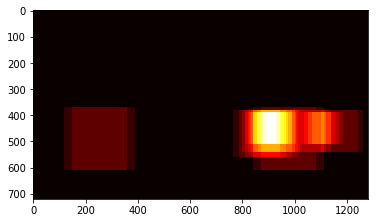

In [12]:
img = hot_to_rgb(mp)
plt.imshow(np.dstack((img[:, :, 0], img[:, :, 1], img[:, :, 2])))

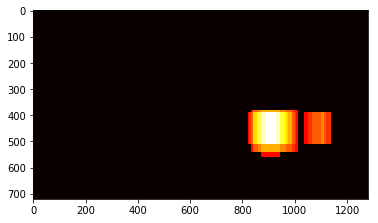

In [13]:
plt.imshow(hot_to_rgb(tmp))

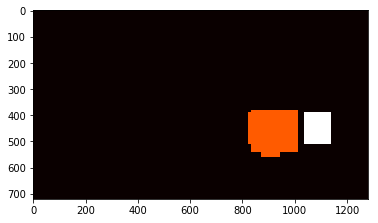

In [14]:
plt.imshow(hot_to_rgb(lmp))